In [10]:
import heapq as hq
# heapq es un módulo proporciona una implementación del algoritmo de cola con prioridad (monticulos). 
# Los montículos son árboles binarios para los cuales cada nodo padre tiene un valor menor o igual que cualquiera de sus hijos.
import numpy as np
import graphviz as gv
import math

In [11]:
# dijkstra(Grafo, source)
def dijkstra(G, s):
  # cantidad de nodos
  n = len(G)
  # arreglo de nodos visitados, inicializado en False
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n

  cost[s] = 0
  pqueue = [(0, s)]
  while pqueue:
    g, u = hq.heappop(pqueue)
    if not visited[u]:
      visited[u] = True
      for v in range(n):
        if G[u, v] > 0 and not visited[v]:
          f = g + G[u, v]
          if f < cost[v]:
            cost[v] = f
            path[v] = u
            hq.heappush(pqueue, (f, v))

  return path, cost

In [12]:
%%file 0501.am
0 2 0 2 9 0 0 0
2 0 1 2 0 2 0 0
0 1 0 0 2 0 2 0
2 2 0 0 0 9 0 3
9 0 2 0 0 0 0 8
0 2 0 9 0 0 7 0
0 0 2 0 0 7 0 3
0 0 0 3 8 0 3 0

Overwriting 0501.am


In [13]:
G = np.loadtxt("0501.am")
print(G)

[[0. 2. 0. 2. 9. 0. 0. 0.]
 [2. 0. 1. 2. 0. 2. 0. 0.]
 [0. 1. 0. 0. 2. 0. 2. 0.]
 [2. 2. 0. 0. 0. 9. 0. 3.]
 [9. 0. 2. 0. 0. 0. 0. 8.]
 [0. 2. 0. 9. 0. 0. 7. 0.]
 [0. 0. 2. 0. 0. 7. 0. 3.]
 [0. 0. 0. 3. 8. 0. 3. 0.]]


In [14]:
def drawG_am(G, directed=False, weighted=False, path=[], layout="sfdp"):
  graph = gv.Digraph("digrafo") if directed else gv.Graph("grafo")
  graph.graph_attr["layout"] = layout
  graph.edge_attr["color"] = "gray"
  graph.node_attr["color"] = "orangered"
  graph.node_attr["width"] = "0.1"
  graph.node_attr["height"] = "0.1"
  graph.node_attr["fontsize"] = "8"
  graph.node_attr["fontcolor"] = "mediumslateblue"
  graph.node_attr["fontname"] = "monospace"
  graph.edge_attr["fontsize"] = "8"
  graph.edge_attr["fontname"] = "monospace"
  n = len(G)
  added = set()
  for v, u in enumerate(path):
    if u != -1:
      if weighted:
        graph.edge(str(u), str(v), str(G[u, v]), dir="forward", penwidth="2", color="orange")
      else:
        graph.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for v in range(n):
      draw = False
      if G[u, v] > 0 and not directed and not f"{u},{v}" in added:  
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        draw = True
      elif directed:
        draw = True
      if draw:
        if weighted:
          # Además de la incidencia (de que nodo a que nodo va), se pasa por 
          # parámetro el peso de la arista
          graph.edge(str(u), str(v), str(G[u, v]))
        else:
          graph.edge(str(u), str(v))
  return graph

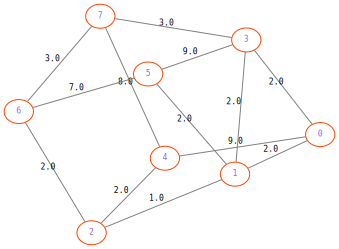

In [15]:
drawG_am(G, weighted=True)

[3, 3, 1, -1, 2, 1, 2, 3]
[2.0, 2.0, 3.0, 0, 5.0, 4.0, 5.0, 3.0]


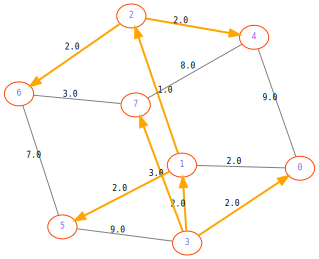

In [17]:
path, cost = dijkstra(G, 3)
# Mostrará el último nodo en el camino desde el nodo origen hasta cualquier nodo
# que en este caso serían los nodos objetivo
print(path)
# Mostrará el mínimo coste de ir desde el nodo origen hasta los demás nodos
# (nodos objetivos)
print(cost)
drawG_am(G, weighted=True, path=path)